<a href="https://colab.research.google.com/github/deondmello16/PyTorch-Journey/blob/main/PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Classifiaction Problem ?

The Concepts that we'll leran in this notebook

|Concept| Topics|
|--------|-----------|
|Architecture of a classification neural netwrok |Neural networks can come in almost any shape or size, but they typically follow a similar floor plan.|
|1. Getting binary classification data ready	|Data can be almost anything but to get started we're going to create a simple binary classification dataset.
|
|2. Building a PyTorch classification model	|Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop specific to classification.
|
|3. Fitting the model to data (training)	|We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
|
|4. Making predictions and evaluating a model (inference)	|Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
|
|5. Improving a model (from a model perspective)	|We've trained an evaluated a model but it's not working, let's try a few things to improve it.
|
|6. Non-linearity	|So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines?
|
|7. Replicating non-linear functions	|We used non-linear functions to help model non-linear data, but what do these look like?
|
|8. Putting it all together with multi-class classification	|Let's put everything we've done so far for binary classification together with a multi-class classification problem.|

## 1. Making data for classifiaction

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42,
                   )



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.DataFrame(X,y,columns=['X','y'])
df

,X,y
1,0.754246,0.231481
1,-0.756159,0.153259
1,-0.815392,0.173282
1,-0.393731,0.692883
0,0.442208,-0.896723
...,...,...
0,0.244054,0.944125
0,-0.978655,-0.272373
1,-0.136900,-0.810012
0,0.670362,-0.767502


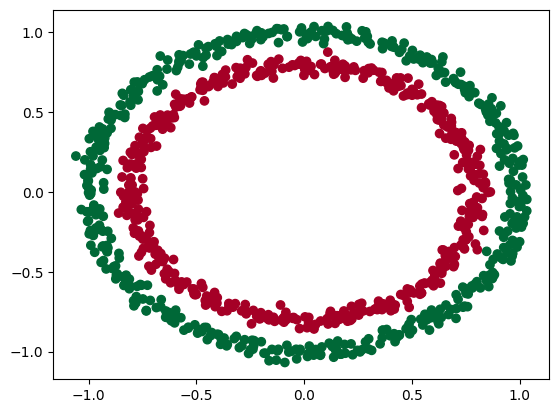

In [ ]:
plt.figure()

plt.scatter(df['X'],df['y'],c=y,
            cmap = plt.cm.RdYlGn_r)

## Lets convert the data that has been generated into `torch.tensor`

In [ ]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=42,test_size = 0.2)

Xtrain[:5],Xtest[:5],ytrain[:5],ytest[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
len(Xtrain), len(Xtest), len(ytrain), len(ytest)

(800, 200, 800, 200)

### Building the model 1

In [ ]:
import torch

from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

  def forward(self,x):

    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV1().to(device)

model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
un_trained_preds = model_0(Xtrain.to(device))

# un_trained_preds[:5] == y_train[:5].to(device)
un_trained_preds.squeeze(axis=-1)[:5]

tensor([-0.3308, -0.2496, -0.2930, -0.2667, -0.6336], grad_fn=<SliceBackward0>)

#### Seting up loss function to train the model

| Loss function/Optimizer |	Problem type |	PyTorch Code|
|-------------------------|---------------|--------------|
|Stochastic Gradient Descent (SGD) optimizer	|Classification, regression, many others. |	torch.optim.SGD()|
|Adam Optimizer |	Classification, regression, many others.	|torch.optim.Adam()|
|Binary cross entropy loss| 	Binary classification	| torch.nn.BCELossWithLogits or torch.nn.BCELoss|
|Cross entropy loss	| Mutli-class classification |	torch.nn.CrossEntropyLoss |
|Mean absolute error (MAE) or L1 Loss |	Regression	| torch.nn.L1Loss|
| Mean squared error (MSE) or L2 Loss |	Regression	 |torch.nn.MSELoss |


In [ ]:
# creating a loss function

loss_fn = nn.BCEWithLogitsLoss()

# creating a optimizer

optimizer =  torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

In [ ]:
def accuracy(y_pred,y_true):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100

#### Model train

In [ ]:
torch.manual_seed(42)

epochs = 100

X_train,y_train = Xtrain.to(device),ytrain.to(device)
X_test,y_test = Xtest.to(device),ytest.to(device)

for epoch in range(epochs+1):


  model_0.train()

  y_logits = model_0(Xtrain).squeeze()

  y_preds = torch.round(torch.sigmoid(y_logits))


  loss = loss_fn(y_logits,y_train)

  acc = accuracy(y_pred=y_preds,y_true = y_train)

  optimizer.zero_grad()

  loss.backward()


  model_0.eval()

  with torch.inference_mode():

    test_logits = model_0(X_test).squeeze()

    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy(y_true=y_test,
                        y_pred=test_preds)
    if (epoch%10 ==0):
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test: {test_loss:.5f}| Test acc: {test_acc:.2f}%" )

Epoch: 0 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 10 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 20 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 30 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 40 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 50 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 60 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 70 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 80 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 90 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%
Epoch: 100 | Loss: 0.69569 | Accuracy: 50.00 | Test: 0.69741| Test acc: 50.00%


####  Making predictions and evaluating the model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

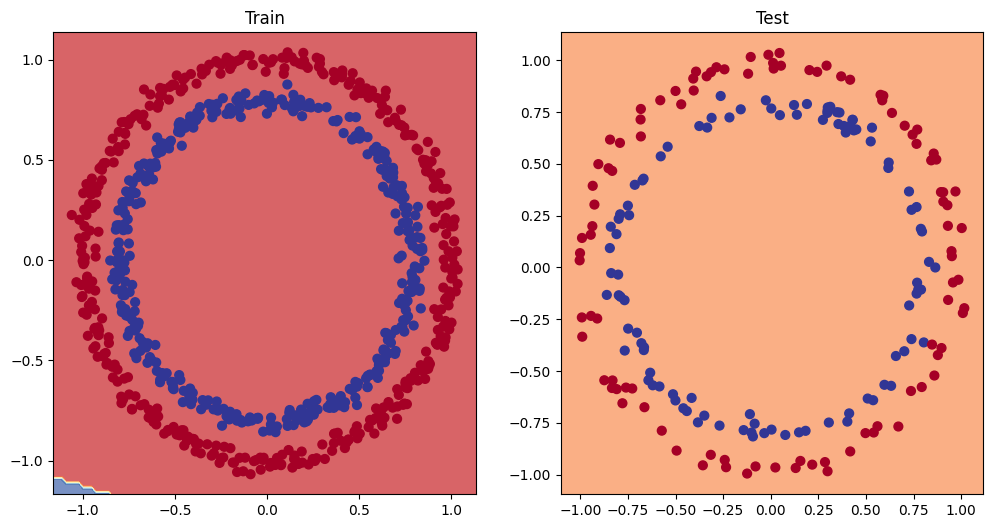

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, Xtrain, ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, Xtest, ytest)


### Improving the model for more accuracy

| Model improvement technique* |	<div style="width:20px">What does it do?</div> |
|------------------------------|--------------------|
| Add more layers |	Each layer potentially increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network deeper.|
| Add more hidden units |	Similar to the above, more hidden units per layer means a potential increase in learning capabilities of the model, more hidden units is often referred to as making your neural network wider. |
| Fitting for longer (more epochs) |	Your model might learn more if it had more opportunities to look at the data. |
| Changing the activation functions |	Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| Change the learning rate |	Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| Change the loss function	 | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| Use transfer learning	 | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in notebook 06. |

In [ ]:
## recreating the model_0 but with more parameters
import torch
from torch import nn


class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    ## Layer of the model

    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)


  def forward(self,X):
    return self.layer_3(self.layer_2(self.layer_1(X)))


model_1 = CircleModelV2().to(device)

model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]])),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642])),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.2663,  0.1232, -0.0157, -0.1907, -0.1

In [ ]:
#creating a loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_1.parameters(), lr=0.01)



In [ ]:
# now train the model


epochs = 1000

torch.manual_seed(42)

X_train,y_train = Xtrain.to(device),ytrain.to(device)
X_test,y_test = Xtest.to(device),ytest.to(device)


for epoch in range(epochs+1):

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc =  accuracy(y_pred=y_pred,y_true = ytrain)

  optimizer.zero_grad()


  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():

    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy(test_preds,ytest)
    if (epoch%10 == 0):
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 10 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 20 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 30 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 40 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 50 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 60 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 70 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 80 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 90 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 100 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epoch: 110 | Loss: 0.69379, Accuracy: 48.62% | Test loss: 0.69263, Test acc: 49.00%
Epo

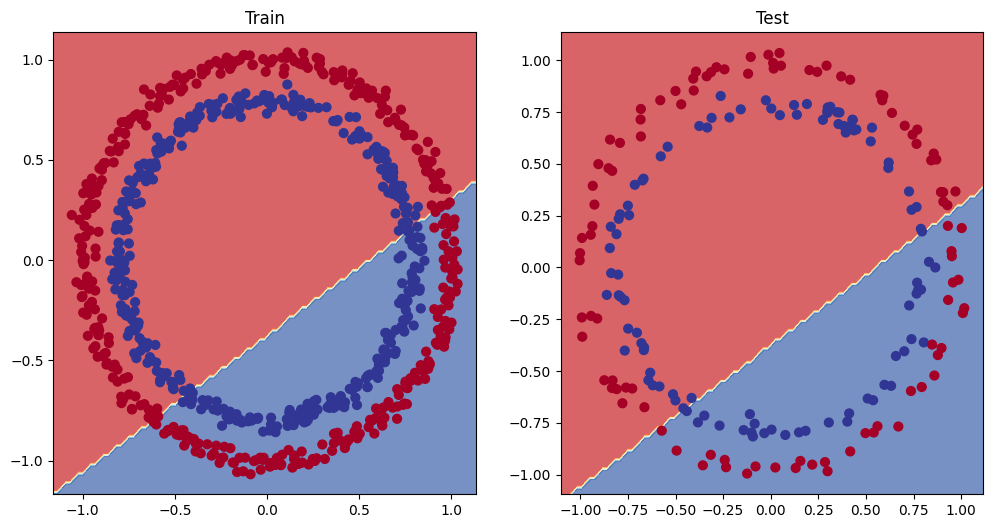

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, Xtrain, ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, Xtest, ytest)

## INTRODUCING NOn-LINEARITY

In [ ]:
import torch
from torch import nn

class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features = 10)
    self.layer_2 = nn.Linear(in_features=10,out_features = 10)
    self.layer_3 = nn.Linear(in_features=10,out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_2 = CircleModelV3().to(device)
model_2

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
## preparing the loss_fn and the optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_2.parameters(),lr = 0.01)



In [ ]:
y_logits.shape

torch.Size([800, 2])

In [ ]:
torch.manual_seed(42)

epoch = 1000

X_train,y_train = Xtrain.to(device),ytrain.to(device)
X_test,y_test = Xtest.to(device),ytest.to(device)


for epoch in range(epochs+1):

  y_logits = model_2(Xtrain).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_pred=y_preds,y_true=y_train)

  optimizer.zero_grad()

  loss.backward()


  optimizer.step()

  model_2.eval()

  with torch.inference_mode():

    test_logits = model_2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)

    test_accuracy = accuracy(y_pred = test_preds, y_true = y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Loss: 0.69200, Accuracy: 52.62% | Test Loss: 0.69132, Test Accuracy: 50.50%
Epoch: 100 | Loss: 0.16737, Accuracy: 99.62% | Test Loss: 0.20090, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.01483, Accuracy: 100.00% | Test Loss: 0.02715, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00577, Accuracy: 100.00% | Test Loss: 0.01475, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00315, Accuracy: 100.00% | Test Loss: 0.01063, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00199, Accuracy: 100.00% | Test Loss: 0.00872, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00137, Accuracy: 100.00% | Test Loss: 0.00754, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00100, Accuracy: 100.00% | Test Loss: 0.00676, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00076, Accuracy: 100.00% | Test Loss: 0.00621, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00060, Accuracy: 100.00% | Test Loss: 0.00579, Test Accuracy: 100.00%
Epoch: 1000 | Loss: 0.00048, Accuracy: 100.00% | Test Loss: 0.00542, Test Accuracy: 100.00%


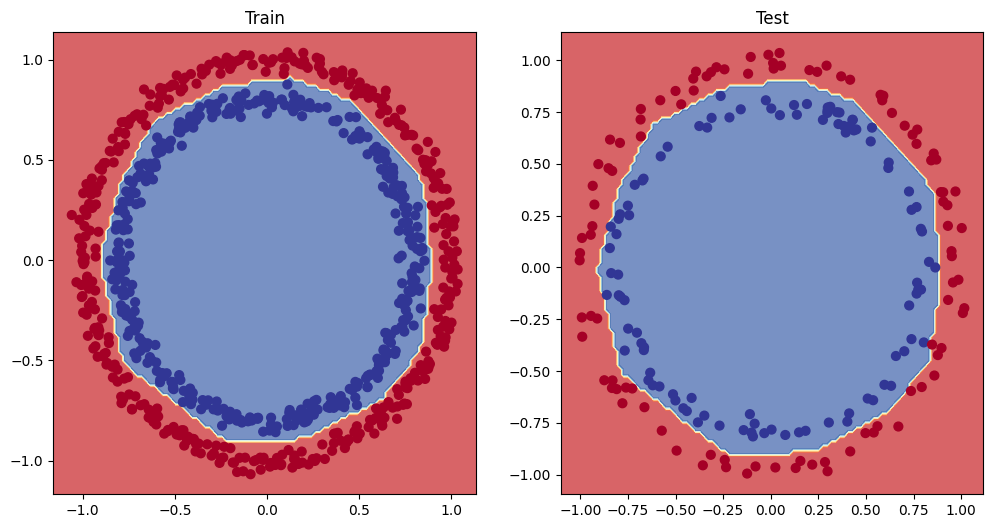

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, Xtrain, ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, Xtest, ytest)

## Putting things together by building a multi-class PyTorch model¶


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
classes = 4
points = 1000
features = 2
random_seed = 42

X_blob, y_blob = make_blobs(
    n_samples= points,
    centers=classes,
    random_state = 42,
    cluster_std= 1.5,
    n_features = 2,
    shuffle = True
)



In [ ]:
X_blob[:10],y_blob[:10]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475],
        [-6.7941075 , -6.47722117],
        [ 5.21017561,  2.8890483 ],
        [-5.50513568, -6.36037688],
        [-6.54375599, -4.83389895],
        [ 6.44964229,  0.74776618]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [ ]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [ ]:
# split the data set


X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size = 0.2, random_state = 42,)
X_blob_train[:10],X_blob_test[:10],y_blob_train[:10],y_blob_test[:10],

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175],
         [ 0.7755,  7.8018],
         [-4.2962,  9.9991],
         [ 3.8225,  2.5719],
         [-7.6469,  5.4421],
         [-3.7474,  8.5322]]),
 tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654],
         [-9.7570,  7.8658],
         [-4.4295, -8.5996],
         [-2.1731,  9.0332],
         [-9.2145, -7.5223],
         [-1.4015,  9.2713]]),
 tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0.]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

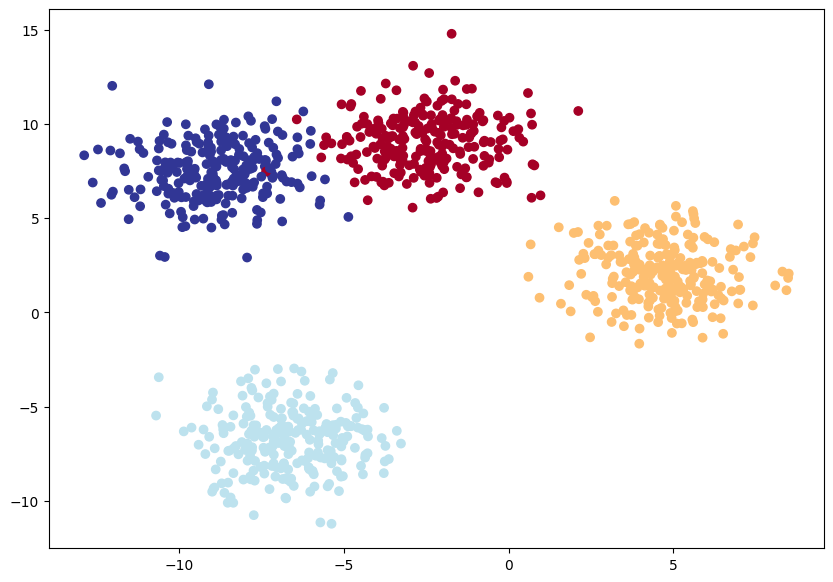

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:

# class BlobClassifier(nn.Module):
#   def __init__(self, input_features, output_features, hidden_units):
#     super().__init__()

#     self.layer_1 = nn.Linear(in_features = input_features, out_features = hidden_units)
#     self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
#     self.layer_3 = nn.Linear(in_features = hidden_units, out_features = output_features)

#   def forward(self,x):
#     return self.layer_3(self.layer_2(self.layer_1(x)))

class BlobClassifier(nn.Module):
  def __init__(self,input_features,output_features,hidden_units = 8):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
        # nn.ReLU(),
    )

  def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.layer_stack(x)

In [ ]:
model_4 = BlobClassifier(input_features = features, output_features= classes, hidden_units=8)

model_4

BlobClassifier(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model_4.parameters(),lr = 0.01)

In [ ]:
epochs = 1000

torch.manual_seed(42)

X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.long().to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.long().to(device)


for epoch in range(epochs+1):

  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits,dim = 1).argmax(dim=1)


  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy(y_pred=y_preds,y_true=y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim = 1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy(y_pred=test_preds,y_true=y_blob_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.09778, Test Acc: 46.50%
Epoch: 10 | Loss: 0.66860, Acc: 80.88% | Test Loss: 0.68123, Test Acc: 93.00%
Epoch: 20 | Loss: 0.38183, Acc: 98.00% | Test Loss: 0.36981, Test Acc: 99.00%
Epoch: 30 | Loss: 0.12265, Acc: 98.88% | Test Loss: 0.10953, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04622, Acc: 99.25% | Test Loss: 0.03843, Test Acc: 99.50%
Epoch: 50 | Loss: 0.03069, Acc: 99.25% | Test Loss: 0.02161, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02691, Acc: 99.25% | Test Loss: 0.01760, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02535, Acc: 99.25% | Test Loss: 0.01534, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02456, Acc: 99.12% | Test Loss: 0.01451, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02404, Acc: 99.38% | Test Loss: 0.01350, Test Acc: 99.50%
Epoch: 100 | Loss: 0.02365, Acc: 99.38% | Test Loss: 0.01305, Test Acc: 99.50%
Epoch: 110 | Loss: 0.02332, Acc: 99.38% | Test Loss: 0.01257, Test Acc: 99.50%
Epoch: 120 | Loss: 0.02304, Acc: 99.38% | Test Loss: 0.01216, T

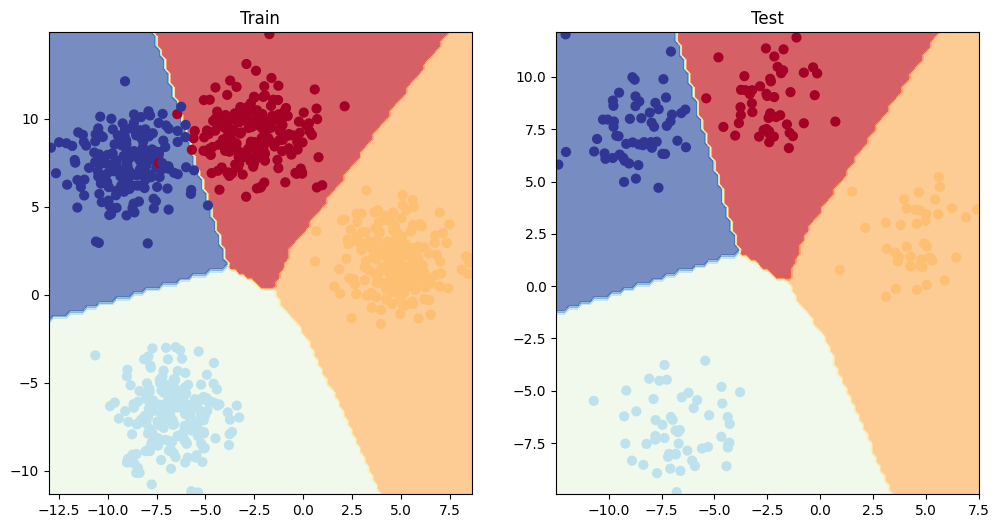

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
# print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
# print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

y_preds.shape,y_blob_test.shape

(torch.Size([800]), torch.Size([200]))

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 -q # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
print(torchmetrics_accuracy(y_preds, y_blob_train))

tensor(0.9950)
